<a href="https://colab.research.google.com/github/harsh21CSU182/Harsh-Kaushik-RL/blob/main/RL_PRACTICAL_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***UCB***

Arm 0: Estimated Mean = -0.6075867198968722
Arm 1: Estimated Mean = 0.1742571498195242
Arm 2: Estimated Mean = 0.2708052298839226
Arm 3: Estimated Mean = 0.35078871982504356
Arm 4: Estimated Mean = 0.7988244303466028


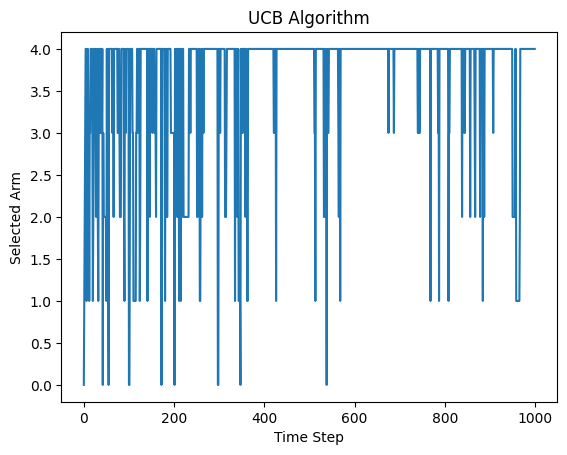

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of arms (bandit machines)
num_arms = 5

# True mean reward for each arm (unknown to the algorithm)
true_means = np.random.rand(num_arms)

# Number of time steps
num_steps = 1000

# Initialize variables for tracking rewards and action counts
total_rewards = np.zeros(num_arms)
action_counts = np.zeros(num_arms)

# Initialize the UCB values for each arm
ucb_values = np.zeros(num_arms)

# Initialize the list to store the history of selected arms
chosen_arms = []

# Exploration parameter (tune this value)
exploration_parameter = 2.0

# Run the UCB algorithm
for t in range(num_steps):
    # Select an arm based on UCB values
    selected_arm = np.argmax(ucb_values)

    # Simulate pulling the selected arm and observe the reward (sample from a Gaussian distribution with true mean)
    reward = np.random.normal(true_means[selected_arm], 1)

    # Update total rewards and action counts
    total_rewards[selected_arm] += reward
    action_counts[selected_arm] += 1

    # Update UCB values for all arms
    for arm in range(num_arms):
        if action_counts[arm] == 0:
            # If an arm hasn't been pulled yet, set its UCB value to a high value to encourage exploration
            ucb_values[arm] = float('inf')
        else:
            # Calculate UCB value for the arm
            mean_reward = total_rewards[arm] / action_counts[arm]
            exploration_bonus = exploration_parameter * np.sqrt(np.log(t + 1) / action_counts[arm])
            ucb_values[arm] = mean_reward + exploration_bonus

    # Record the selected arm for this time step
    chosen_arms.append(selected_arm)

# Print the estimated means for each arm
for arm in range(num_arms):
    estimated_mean = total_rewards[arm] / action_counts[arm]
    print(f"Arm {arm}: Estimated Mean = {estimated_mean}")

# Plot the results
plt.plot(chosen_arms)
plt.xlabel("Time Step")
plt.ylabel("Selected Arm")
plt.title("UCB Algorithm")
plt.show()